In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the data

In [3]:
#reading the .csv file using pandas
df = pd.read_csv('./Dataset/train.csv')
print(df.shape)

(42000, 785)


In [4]:
#printing all the column names
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [5]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


So, our dataset has 42,000 examples.

In [7]:
#Splitting the dataset into X and Y
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [8]:
#printing all the classes present in the dataset
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Splitting into test and train data

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


### Visualizing data

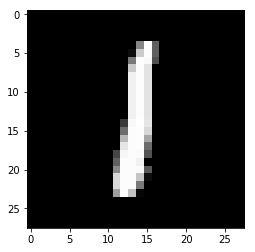

1


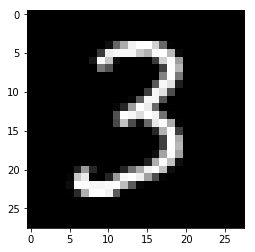

3


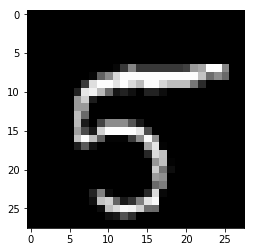

5


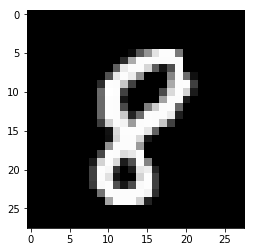

8


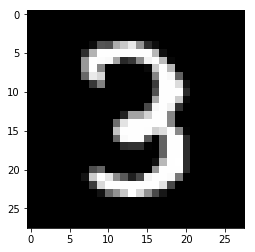

3


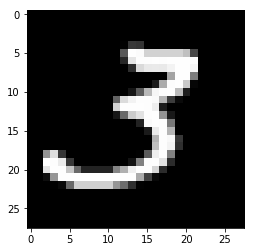

3


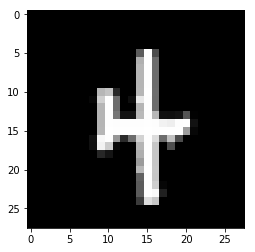

4


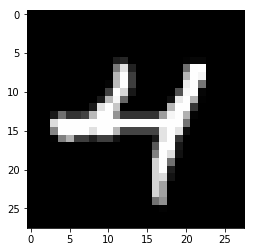

4


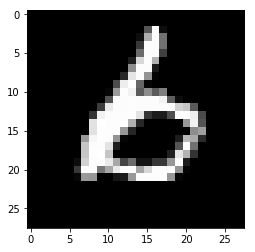

6


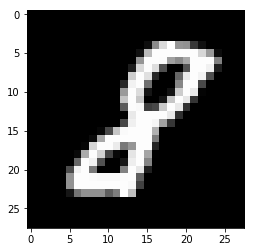

8


In [10]:
def drawImg(sample):
    '''
    draws the image for a given sample
    '''
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()  

#drawing first 10 images present in the dataset with their labels
for i in range(10):
    drawImg(X_train[i])
    print(Y_train[i])

## Creating our SVM classifier from scratch

In [11]:
class SVM:
    def __init__(self, c=1.0):
        self.c = c
        self.w = 0
        self.b = 0
    
    def loss(self, X, Y, w, b):
        c = self.c
        loss = 0
        for i in range(X.shape[0]):
            ti = Y[i]*(w@X[i] + b)
            loss += c*max(0,1-ti)
        loss += 0.5 * w.T@w
        return loss
            
    def fit(self, X, Y, batch_size = 100, learning_rate = 0.001, max_itr = 300):
        '''
        This function is used to train the classifier
        '''
        w = np.zeros((X.shape[1],))
        b = 0
        c = self.c
        n = learning_rate
        losses  = []
        
        indices = np.arange(X.shape[0])
        
        for i in range(max_itr):
            losses.append(self.loss(X,Y,w,b))
            np.random.shuffle(indices)
            
            #iterating each batch
            for batch_start in range(0,X.shape[0],batch_size):
                gradw = np.zeros(X.shape[1],)
                gradb = 0
                
                #iterating each example of a batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<X.shape[0]:
                        ix = indices[j]
                        ti = Y[ix]*(w@X[ix] + b)

                        if ti<1:
                            gradw += c*Y[ix]*X[ix]
                            gradb += c*Y[ix]
                        
                w = w - n*w + n*gradw
                b = b + n*gradb
                
                
        self.w = w
        self.b = b
        return w, b, losses

## one-vs-rest classification

In [12]:
#CLASSES variable is assigned the number of classes present in the training data
CLASSES = len(np.unique(Y_train))

In [13]:
def getClassWiseData(x,y):
    '''
    This function returns a dictionary of class-wise data
    '''
    data = {}
    classes = np.unique(y)
    for i in classes:
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

def getOVRdata(data,M,class_label):
    '''
    Modifies the data labels so that it can be used for one-vs-rest classification
    '''
    nos = data[class_label].shape[0]
    no_of_features = data[class_label].shape[1]
    
    y = np.zeros((M,))
    
    x = data[class_label]
    
    for i in range(CLASSES):
        if not i==class_label:
            x = np.vstack((x,data[i]))
    
    y[:nos] = 1
    y[nos:] = -1
        
    return x,y
    
        

In [14]:
def trainSVMs(x,y):
    '''
    This function trains N SVM classifiers, one for each class.
    (N : number of classes present in the training data)
    '''
    svm_classifiers = {}
    data = getClassWiseData(x,y)
    for i in range(CLASSES):
        x_ovr,y_ovr = getOVRdata(data,x.shape[0],i)
        wts,b,loss = mySVM.fit(x_ovr,y_ovr,learning_rate=0.0000000001,max_itr=100)
        svm_classifiers[i] = (wts,b)
            
        plt.plot(loss)
        plt.show()  
    
    return svm_classifiers

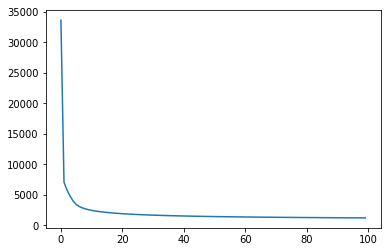

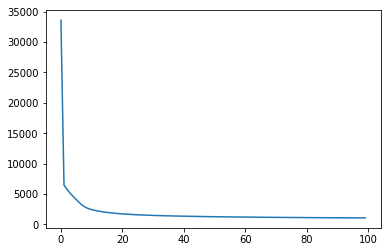

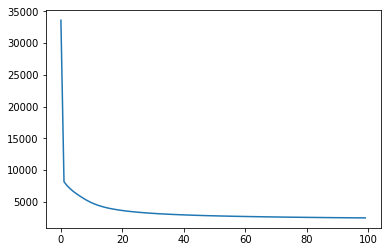

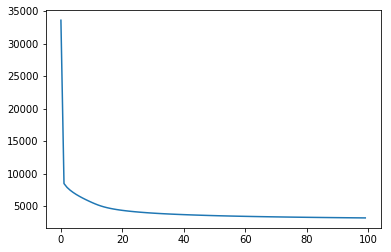

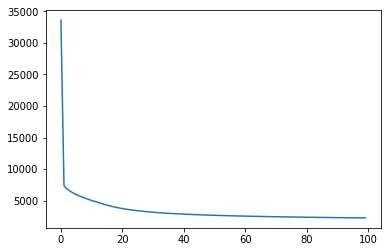

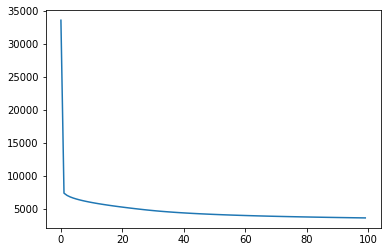

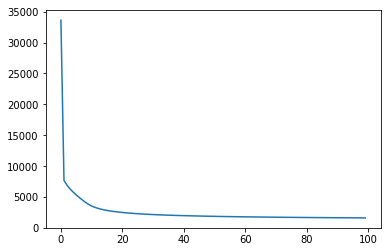

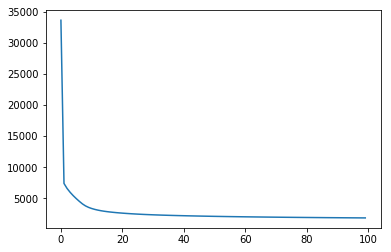

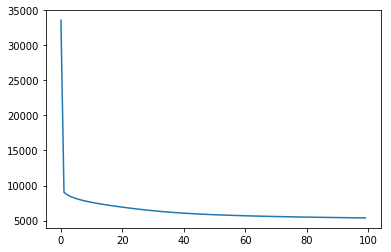

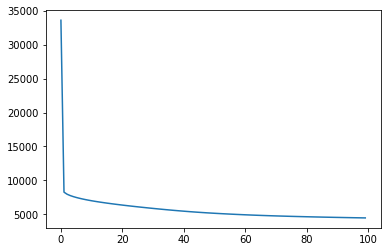

CPU times: user 4min 30s, sys: 4.21 s, total: 4min 34s
Wall time: 4min 29s


In [15]:
%%time
#initializing an object of class SVM(creted by us), and c = 1.0
mySVM = SVM(c=1.0)
#training N classifiers 
svm_classifiers = trainSVMs(X_train,Y_train)

In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def binaryPredict(x,w,b):
    '''
    returns the probability that the given data point belongs to 
    the class whose classifier is given as an input
    '''
    z  = np.dot(x,w.T) + b
    return sigmoid(z)

def predict(x):
    '''
    makes the final prediction by computing the probability of each class
    for a given data point
    '''
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        w,b = svm_classifiers[i]
        #Take a majority prediction 
        z = binaryPredict(x,w,b)
#         print(z)
        count[i]+=z
        
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [17]:
print(predict(X_test[1]))
print(Y_test[1])

1
1


In [18]:
def accuracy(x,y):
    '''
    returns the accuracy of the classifiers for the given testing data
    '''
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [19]:
print('Training Accuracy : %.4f' %accuracy(X_train, Y_train))
print('Testing Accuracy : %.4f' %accuracy(X_test, Y_test))

Training Accuracy : 0.8877
Testing Accuracy : 0.8761
